# Sentiment Analysis form 1.6M Tweets

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import math
import nltk
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file='/content/drive/MyDrive/training.csv'
df= pd.read_csv(file, encoding='ISO-8859-1')

Mounted at /content/drive


In [ ]:
df.columns=['target','feature']

In [ ]:
df.head(5)

,target,feature
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


## Data Cleaning





In [ ]:
df['feature'] = df['feature'].apply(lambda x: re.sub(r'@\w+', '', x))
df['feature'] = df['feature'].str.replace('https://*', '')
df['feature'] = df['feature'].str.replace('@', '')
df['feature'] = df['feature'].str.replace('[^\w\s]','')
df['feature'] = df['feature'].apply(lambda x: " ".join(x.lower() for x in x.split()))
nltk.download('stopwords')
stop = stopwords.words('english')
df['feature'] = df['feature'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
nltk.download('wordnet')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
df['feature'] = df['feature'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in w_tokenizer.tokenize(x)]))


<ipython-input-7-1a8e2999b4d6>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['feature'] = df['feature'].str.replace('https://*', '')
<ipython-input-7-1a8e2999b4d6>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['feature'] = df['feature'].str.replace('[^\w\s]','')
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
class_0 = df[df['target'] == 0]
class_4 = df[df['target'] == 4]
class_0_balanced = class_0.sample(n=len(class_4), random_state=42)
bdf = pd.concat([class_0_balanced, class_4])
bdf = bdf.sample(frac=1, random_state=42)


In [ ]:
x= bdf.feature
y= bdf.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=378)

In [ ]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)

## Logistic Regression

In [ ]:
logi = LogisticRegression(max_iter=3000)
logi.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

## Accuracy

In [ ]:
y_pred = logi.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy=",accuracy*100)

Accuracy= 78.11648278705836


## Confusion Matrix

In [ ]:
print('Classification Report:\n',classification_report(y_test, y_pred ))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.78     49814
           4       0.77      0.80      0.78     49617

    accuracy                           0.78     99431
   macro avg       0.78      0.78      0.78     99431
weighted avg       0.78      0.78      0.78     99431

Confusion Matrix:
 [[37980 11834]
 [ 9925 39692]]


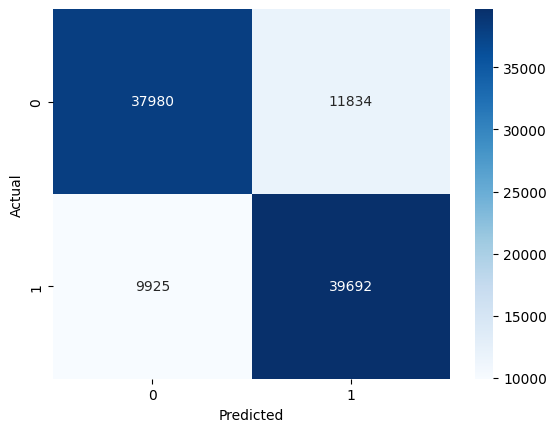

In [ ]:
y_pred = logi.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## ROC

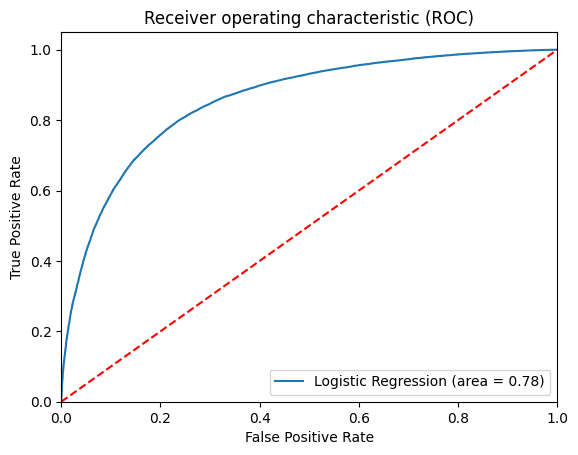

In [ ]:

logit_roc_auc = roc_auc_score(y_test, logi.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logi.predict_proba(X_test)[:,1],pos_label=4)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
